# **Data Bootcamp Midterm Project**
## By Elizabeth Tang and Wonny Min

---
### **Project Description**: Investigating the intersection of coffee quality, consumption, and health.

*   Is there a measurable relationship between average coffee consumption and rates of heart disease, diabetes, or obesity across countries?

*   Do populations with higher coffee consumption show better or worse self-reported health indicators (e.g., energy, sleep quality, mental health sentiment online)?

*   How does caffeine intake relate to average life expectancy or reported well-being metrics?

### **Purpose**

We chose to investigate the intersection of coffee quality, consumption, and health because it connects everyday behavior with global health outcomes in a way that is both data-rich and socially meaningful. Coffee is one of the most widely consumed beverages in the world, yet its effects on health—both positive and negative—remain debated. By combining datasets on national coffee consumption, disease prevalence, and self-reported well-being, we can explore how lifestyle habits reflect and possibly influence population health. This topic allows us to integrate diverse types of data (economic, nutritional, and epidemiological) and apply analytical methods that link consumer behavior with public health indicators. It also provides an opportunity to critically assess how perceptions of caffeine and “healthy energy” evolve across cultures, blending quantitative analysis with human-centered insight.

### **Contents**
1. Dataset 1: Coffee Dataset
2. Dataset 2: Coffee Quality Data (CQI May-2023)
3. Dataset 3: Comprehensive Analysis of Coffee Health Correlation
4. Dataset 4: World Health Organization Data for Health Indicators
5. Analysis Questions
6. Conclusion



---



In [ ]:
# install wbgapi (needed once)
!pip install wbgapi

# install PRAW (needed once)
%pip install praw

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from IPython.display import display, HTML
import wbgapi as wb
import praw
import re
import statsmodels.api as sm
from scipy import stats

import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
# clone data from github files from Elizabeth (LIZonga)
!git clone -b midterm_data_files https://github.com/LIZonga/data_bootcamp_midterm.git

# **Dataset 1: [Coffee Dataset](https://www.kaggle.com/datasets/michals22/coffee-dataset?resource=download)**

This is a comprehensive Coffee dataset for coffee economic indicatores from the International Coffee Organization dataset in kilo (1000 grams) units. Includes information on:

*   Coffee's domestic consumption ```Coffee_domestic_consumption.csv```
*   Coffee's importer's consumption ```Coffee_importers_consumption.csv```
*   International exports on Coffee ```Coffee_export.csv```
*   International imports on Coffee ```Coffee_import.csv```
*   Coffee production ```Coffee_production.csv```









In [ ]:
# pull the data
C_domestic_consumption_df = pd.read_csv('/content/data_bootcamp_midterm/Coffee_domestic_consumption.csv')

# view the data for Coffee_domestic_consumption
display(C_domestic_consumption_df.head())
display(C_domestic_consumption_df.info())

In [ ]:
# total consumption per year in kilo (1000 grams) unit
year_columns = C_domestic_consumption_df.columns[2:-1] # taking out 'Country', 'Coffee type', and 'Total_domestic_consumption'
yearly_consumption_df = C_domestic_consumption_df[year_columns].sum()
display(yearly_consumption_df)

In [ ]:
# top 10 contries with the highest consumption in kilo (1000 grams) unit
top_10_countries = C_domestic_consumption_df.groupby('Country')['Total_domestic_consumption'].sum().sort_values(ascending=False).head(10)
display(top_10_countries)

In [ ]:
# global trend of Coffee consumption over time using a grid
plt.plot(yearly_consumption_df.index, yearly_consumption_df)
plt.xlabel('Year')
plt.ylabel('Total Domestic Consumption (kilo grams)')
plt.title('Global Trend of Coffee Consumption Over Time')
plt.xticks(rotation = 90) # rotate x-axis labels by 90 degrees for clearer visuals
plt.grid(True)
plt.show()

In [ ]:
C_production_df = pd.read_csv('/content/data_bootcamp_midterm/Coffee_production.csv')

# view the data for Coffee_domestic_consumption
display(C_production_df.head())
display(C_production_df.info())

In [ ]:
# find the global production over time
# use melt() to transform the DataFrame's year columns into rows
production_melted = C_production_df.melt(
    id_vars = ['Country', 'Coffee type', 'Total_production'],
    var_name = 'Year',
    value_name = 'Production'
)

# group by year and sum the Coffee production
global_production = production_melted.groupby('Year')['Production'].sum()
display(global_production)

In [ ]:
# find the top 10 Coffee producers lately
top_10_producers = C_production_df.groupby('Country')['Total_production'].sum().sort_values(ascending=False).head(10)
display(top_10_producers)

In [ ]:
# graphing the global production of coffee over time
plt.plot(global_production.index, global_production)
plt.xlabel('Year')
plt.ylabel('Total Production (kilo grams)')
plt.title('Global Production of Coffee Over Time')
plt.xticks(rotation = 90) # rotate x-axis labels by 90 degrees for clearer visuals
plt.grid(True)
plt.show()

# **Dataset 2: [Coffee Quality Data (CQI May-2023)](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi/data)**

This dataset includes data on Coffee quality and sustainability. It provides data on Coffee production and an evaluation on quality (based on aroma, flavor, sweetness, etc. on the Coffee). Data information on:

*   Coffee quality ```Coffee_quality.csv```

In [ ]:
# load the data
C_quality_df = pd.read_csv('/content/data_bootcamp_midterm/Coffee_quality.csv')

# view the data
display(C_quality_df.head())
display(C_quality_df.info())

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

None

In [ ]:
# find the average Coffee quality of each country based on cup points earned from many factors
avg_C_quality = C_quality_df.groupby('Country of Origin')['Total Cup Points'].mean()
display(avg_C_quality)

,Total Cup Points
Country of Origin,
Brazil,81.883000
Colombia,83.877368
Costa Rica,83.740000
El Salvador,81.532857
Ethiopia,84.960909
Guatemala,84.301429
Honduras,83.282308
Indonesia,83.693333
Kenya,83.710000


In [ ]:
# correlation between the different scoring groups
correlation_score = C_quality_df.select_dtypes(include = np.number).corr()
display(correlation_score)

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
Unnamed: 0,1.000000,1.000000,0.209744,-0.834457,-0.905225,-0.896769,-0.867342,-0.818086,-0.887619,-0.007233,NaN,NaN,-0.918025,NaN,-0.963143,0.046716,0.072819,0.226418,0.282254
ID,1.000000,1.000000,0.209744,-0.834457,-0.905225,-0.896769,-0.867342,-0.818086,-0.887619,-0.007233,NaN,NaN,-0.918025,NaN,-0.963143,0.046716,0.072819,0.226418,0.282254
Number of Bags,0.209744,0.209744,1.000000,-0.227414,-0.264700,-0.304697,-0.204415,-0.040037,-0.259016,0.059370,NaN,NaN,-0.243440,NaN,-0.243753,0.102753,0.043678,0.082271,0.237407
Aroma,-0.834457,-0.834457,-0.227414,1.000000,0.822779,0.793397,0.712920,0.633101,0.745648,-0.028063,NaN,NaN,0.801765,NaN,0.868919,-0.002418,-0.057860,-0.342886,-0.254719
Flavor,-0.905225,-0.905225,-0.264700,0.822779,1.000000,0.876811,0.810934,0.739857,0.851786,-0.039767,NaN,NaN,0.877849,NaN,0.939124,-0.050902,-0.081299,-0.310054,-0.330347
Aftertaste,-0.896769,-0.896769,-0.304697,0.793397,0.876811,1.000000,0.814439,0.738674,0.861951,-0.023926,NaN,NaN,0.865612,NaN,0.934813,-0.051115,-0.107966,-0.303247,-0.330731
Acidity,-0.867342,-0.867342,-0.204415,0.712920,0.810934,0.814439,1.000000,0.765185,0.805236,-0.062564,NaN,NaN,0.840583,NaN,0.897057,-0.016751,-0.110204,-0.209483,-0.262279
Body,-0.818086,-0.818086,-0.040037,0.633101,0.739857,0.738674,0.765185,1.000000,0.816098,-0.043904,NaN,NaN,0.771607,NaN,0.847216,0.009771,0.048256,-0.257465,-0.208784
Balance,-0.887619,-0.887619,-0.259016,0.745648,0.851786,0.861951,0.805236,0.816098,1.000000,-0.089064,NaN,NaN,0.884467,NaN,0.929520,-0.072660,0.039552,-0.315502,-0.317733
Uniformity,-0.007233,-0.007233,0.059370,-0.028063,-0.039767,-0.023926,-0.062564,-0.043904,-0.089064,1.000000,NaN,NaN,-0.074602,NaN,0.003556,0.035240,0.021471,0.038486,0.071714


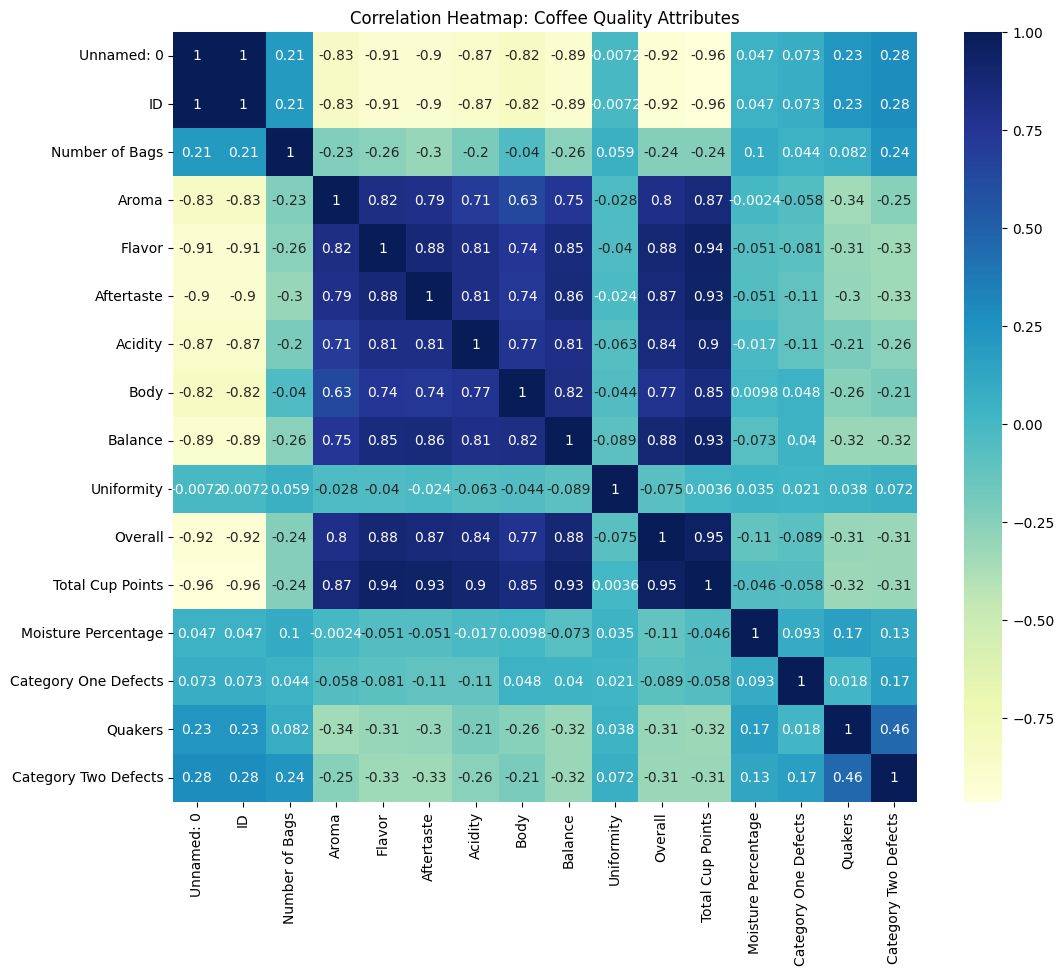

In [ ]:
# remove columns with NaN correlation values for a clean heatmap
correlation_score_cleaned = correlation_score.dropna(axis = 1, how = 'all').dropna(axis = 0, how = 'all')

# create a heatmap of the coffee quality attributes
# darker color = higher correlation, lighter color = lower correlation
plt.figure(figsize = (12, 10))
sns.heatmap(correlation_score_cleaned, annot = True, cmap = 'YlGnBu')
plt.title('Correlation Heatmap: Coffee Quality Attributes')
plt.show()

# **Dataset 3: [Comprehensive Analysis of Coffee Health Correlation](https://www.kaggle.com/code/muhammedaliyilmazz/comprehensive-analysis-of-coffee-health-correlatio/input)**

This dataset includes data on individual records and people correlating their coffee/caffeine habits with health-related symptoms in their life like on sleep. This is across multiple countries. Data information on:

*   How Coffee affects health ```Coffee_and_health.csv```

In [ ]:
# load the data
C_health_df = pd.read_csv('/content/data_bootcamp_midterm/Coffee_and_health.csv')

# view the data
display(C_health_df.head())
display(C_health_df.info())

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

None

In [ ]:
# average cups of Coffee per day by country
avg_cups_coffee = C_health_df.groupby('Country')['Coffee_Intake'].mean()
display(avg_cups_coffee)

,Coffee_Intake
Country,
Australia,2.544266
Belgium,2.411670
Brazil,2.547588
Canada,2.497606
China,2.574664
Finland,2.477843
France,2.528457
Germany,2.466398
India,2.503435


In [ ]:
# Map stress levels to numerical values
stress_level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
C_health_df['Stress_Level_Numeric'] = C_health_df['Stress_Level'].map(stress_level_mapping)

display(C_health_df.head())

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Stress_Level_Numeric
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0,1
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1,1


# **Dataset 4: [World Health Organization Data for Health Indicators](https://www.who.int/data/gho/data/indicators)**

This dataset includes data by the World Health Organization who works to analyze health statistics. Data information on:

*   Overweight among adults, BMI >= 25, age-standardized estimate (%) ```Overweight_BMI_data.csv```
*   Hypertension among adults aged 30-79 years (%) ```Hypertension_data.csv```
*   Diabetes, prevalence (%) ```Diabetes_data.csv```



In [ ]:
# load the data for overweight
overweight_df = pd.read_csv('/content/data_bootcamp_midterm/Overweight_BMI_data.csv')

# view the data
display(overweight_df.head())
display(overweight_df.info())

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,ETH,Ethiopia,Year,2022,...,NaN,NaN,9.10,NaN,12.82,10.9 [9.1-12.8],NaN,NaN,EN,2024-02-29 00:00:00
1,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,RWA,Rwanda,Year,2022,...,NaN,NaN,9.26,NaN,13.87,11.5 [9.3-13.9],NaN,NaN,EN,2024-02-29 00:00:00
2,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,SEAR,South-East Asia,Country,TLS,Timor-Leste,Year,2022,...,NaN,NaN,8.45,NaN,15.05,11.6 [8.5-15.0],NaN,NaN,EN,2024-02-29 00:00:00
3,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,BDI,Burundi,Year,2022,...,NaN,NaN,9.01,NaN,15.12,11.8 [9.0-15.1],NaN,NaN,EN,2024-02-29 00:00:00
4,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,SLE,Sierra Leone,Year,2022,...,NaN,NaN,10.47,NaN,16.22,13.3 [10.5-16.2],NaN,NaN,EN,2024-02-29 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19701 entries, 0 to 19700
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               19701 non-null  object 
 1   Indicator                   19701 non-null  object 
 2   ValueType                   19701 non-null  object 
 3   ParentLocationCode          19701 non-null  object 
 4   ParentLocation              19701 non-null  object 
 5   Location type               19701 non-null  object 
 6   SpatialDimValueCode         19701 non-null  object 
 7   Location                    19701 non-null  object 
 8   Period type                 19701 non-null  object 
 9   Period                      19701 non-null  int64  
 10  IsLatestYear                19701 non-null  bool   
 11  Dim1 type                   19701 non-null  object 
 12  Dim1                        19701 non-null  object 
 13  Dim1ValueCode               197

None

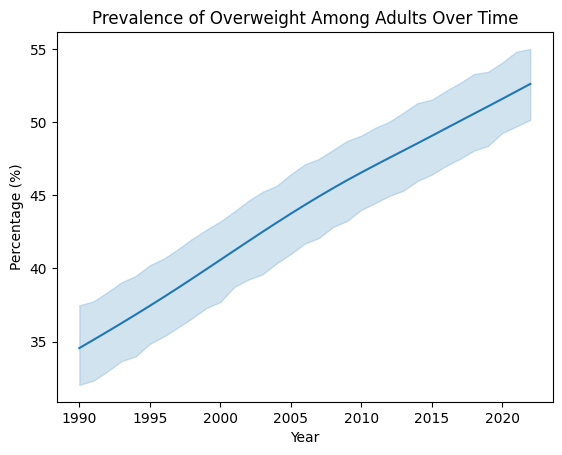

In [ ]:
# find data for men and women in 'Both sexes'
overweight_both_sexes = overweight_df[overweight_df['Dim1'] == 'Both sexes']

# graph how overweight in percentage over time for both men and women
sns.lineplot(x = 'Period', y = 'FactValueNumeric', data = overweight_both_sexes)
plt.title('Prevalence of Overweight Among Adults Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
# load the data for hypertension
hypertension_df = pd.read_csv('/content/data_bootcamp_midterm/Hypertension_data.csv')

# view the data
display(hypertension_df.head())
display(hypertension_df.info())

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_HYP_PREVALENCE_A,"Hypertension among adults aged 30-79 years, pr...",numeric,AFR,Africa,Country,AGO,Angola,Year,2019,...,NaN,NaN,28.7,NaN,49.5,38.7 [28.7-49.5],NaN,NaN,EN,2021-08-20 00:00:00
1,NCD_HYP_PREVALENCE_A,"Hypertension among adults aged 30-79 years, pr...",numeric,AFR,Africa,Country,AGO,Angola,Year,2019,...,NaN,NaN,22.4,NaN,51.7,36.5 [22.4-51.7],NaN,NaN,EN,2021-08-20 00:00:00
2,NCD_HYP_PREVALENCE_A,"Hypertension among adults aged 30-79 years, pr...",numeric,AFR,Africa,Country,AGO,Angola,Year,2019,...,NaN,NaN,27.2,NaN,56.1,40.8 [27.2-56.1],NaN,NaN,EN,2021-08-20 00:00:00
3,NCD_HYP_PREVALENCE_A,"Hypertension among adults aged 30-79 years, pr...",numeric,AFR,Africa,Country,AGO,Angola,Year,2018,...,NaN,NaN,29.4,NaN,48.8,38.8 [29.4-48.8],NaN,NaN,EN,2021-08-20 00:00:00
4,NCD_HYP_PREVALENCE_A,"Hypertension among adults aged 30-79 years, pr...",numeric,AFR,Africa,Country,AGO,Angola,Year,2018,...,NaN,NaN,23.1,NaN,51.2,36.7 [23.1-51.2],NaN,NaN,EN,2021-08-20 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               30000 non-null  object 
 1   Indicator                   30000 non-null  object 
 2   ValueType                   30000 non-null  object 
 3   ParentLocationCode          30000 non-null  object 
 4   ParentLocation              30000 non-null  object 
 5   Location type               30000 non-null  object 
 6   SpatialDimValueCode         30000 non-null  object 
 7   Location                    30000 non-null  object 
 8   Period type                 30000 non-null  object 
 9   Period                      30000 non-null  int64  
 10  IsLatestYear                30000 non-null  bool   
 11  Dim1 type                   30000 non-null  object 
 12  Dim1                        30000 non-null  object 
 13  Dim1ValueCode               300

None

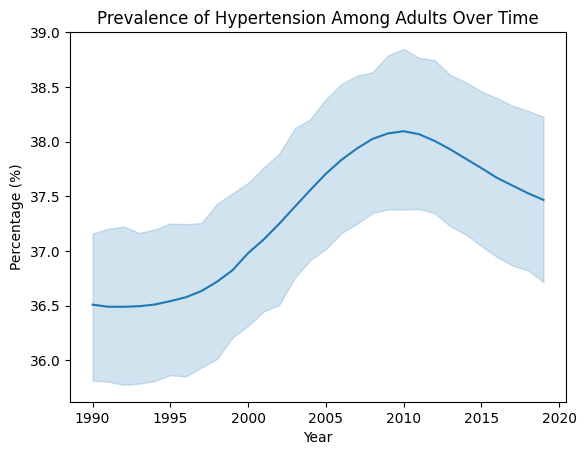

In [ ]:
# find data for both mena nd women in 'Both sexes'
hypertension_both_sexes = hypertension_df[hypertension_df['Dim1'] == 'Both sexes']

# graph hypertension prevalence over time
sns.lineplot(x = 'Period', y = 'FactValueNumeric', data = hypertension_both_sexes)
plt.title('Prevalence of Hypertension Among Adults Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
# load the data for diabetes
diabetes_df = pd.read_csv('/content/data_bootcamp_midterm/Diabetes_data.csv')

# view the data
display(diabetes_df.head())
display(diabetes_df.info())

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_DIABETES_PREVALENCE_AGESTD,"Prevalence of diabetes, age-standardized",numeric,AFR,Africa,Country,AGO,Angola,Year,2022,...,NaN,NaN,9.37,NaN,29.56,18.4 [9.4-29.6],NaN,NaN,EN,2024-11-13 00:00:00
1,NCD_DIABETES_PREVALENCE_AGESTD,"Prevalence of diabetes, age-standardized",numeric,AFR,Africa,Country,AGO,Angola,Year,2022,...,NaN,NaN,11.37,NaN,33.98,21.6 [11.4-34.0],NaN,NaN,EN,2024-11-13 00:00:00
2,NCD_DIABETES_PREVALENCE_AGESTD,"Prevalence of diabetes, age-standardized",numeric,AFR,Africa,Country,AGO,Angola,Year,2022,...,NaN,NaN,7.24,NaN,36.08,19.1 [7.2-36.1],NaN,NaN,EN,2024-11-13 00:00:00
3,NCD_DIABETES_PREVALENCE_AGESTD,"Prevalence of diabetes, age-standardized",numeric,AFR,Africa,Country,AGO,Angola,Year,2022,...,NaN,NaN,8.80,NaN,40.60,22.2 [8.8-40.6],NaN,NaN,EN,2024-11-13 00:00:00
4,NCD_DIABETES_PREVALENCE_AGESTD,"Prevalence of diabetes, age-standardized",numeric,AFR,Africa,Country,AGO,Angola,Year,2022,...,NaN,NaN,6.27,NaN,35.04,17.7 [6.3-35.0],NaN,NaN,EN,2024-11-13 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               30000 non-null  object 
 1   Indicator                   30000 non-null  object 
 2   ValueType                   30000 non-null  object 
 3   ParentLocationCode          30000 non-null  object 
 4   ParentLocation              30000 non-null  object 
 5   Location type               30000 non-null  object 
 6   SpatialDimValueCode         30000 non-null  object 
 7   Location                    30000 non-null  object 
 8   Period type                 30000 non-null  object 
 9   Period                      30000 non-null  int64  
 10  IsLatestYear                30000 non-null  bool   
 11  Dim1 type                   30000 non-null  object 
 12  Dim1                        30000 non-null  object 
 13  Dim1ValueCode               300

None

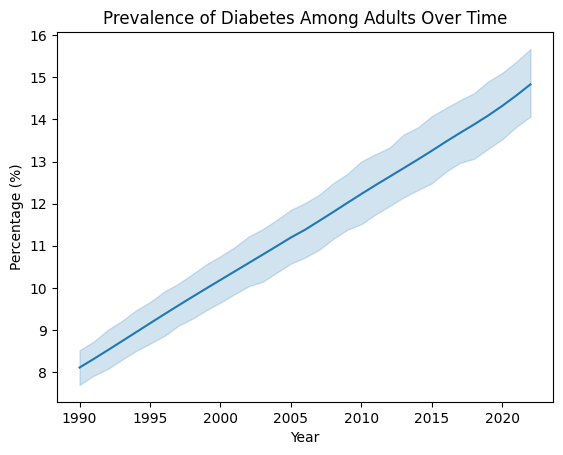

In [ ]:
# find data for both men and women in 'Both sexes'
diabetes_both_sexes = diabetes_df[diabetes_df['Dim1'] == 'Both sexes']

# graph diabetes prevalence over time
sns.lineplot(x = 'Period', y = 'FactValueNumeric', data = diabetes_both_sexes)
plt.title('Prevalence of Diabetes Among Adults Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.show()



---
# **Analysis Questions**


**Question 1**: How does coffee consumption relate to diabetes prevalence and obesity rates globally?

In [ ]:
# calculate average yearly domestic coffee consumption per country
# melt the DataFrame to have years as rows, excluding the 'Total_domestic_consumption' column
coffee_melted = C_domestic_consumption_df.melt(
    id_vars = ['Country', 'Coffee type'],
    var_name = 'Year',
    value_name = 'Consumption_kilo',
    value_vars = [col for col in C_domestic_consumption_df.columns if col not in ['Country', 'Coffee type', 'Total_domestic_consumption']]
)

# convert 'Year' to a numeric format (taking the start year)
coffee_melted['Year_start'] = coffee_melted['Year'].str.split('/').str[0].astype(int)

# calculate average consumption per country across all years
avg_coffee_consumption = coffee_melted.groupby('Country')['Consumption_kilo'].mean().reset_index()
avg_coffee_consumption.rename(columns = {'Consumption_kilo': 'average_coffee_consumption_kilo'}, inplace=True)

# show
display(avg_coffee_consumption.head())

,Country,average_coffee_consumption_kilo
0,Angola,1550000.0
1,Bolivia (Plurinational State of),2506000.0
2,Brazil,927490000.0
3,Burundi,113734.0
4,Cameroon,4781698.0


In [ ]:
# use diabetes data to get the latest prevalence per country
# find 'Both sexes' and sort by year to get the latest data
diabetes_latest = diabetes_df[diabetes_df['Dim1'] == 'Both sexes'].sort_values('Period').drop_duplicates('Location', keep='last')

diabetes_latest = diabetes_latest[['Location', 'FactValueNumeric']].copy()
diabetes_latest.rename(columns = {'Location': 'Country', 'FactValueNumeric': 'latest_diabetes_pct'}, inplace = True)

# show
display(diabetes_latest.head())

,Country,latest_diabetes_pct
23562,Denmark,2.33
20790,Yemen,18.32
792,Botswana,8.97
20394,Syrian Arab Republic,21.70
24354,France,2.69


In [ ]:
# use overweight data to get the latest prevalence per country
# find 'Both sexes' and sort by year to get the latest data
overweight_latest = overweight_df[overweight_df['Dim1'] == 'Both sexes'].sort_values('Period').drop_duplicates('Location', keep = 'last')

overweight_latest = overweight_latest[['Location', 'FactValueNumeric']].copy()
overweight_latest.rename(columns = {'Location': 'Country', 'FactValueNumeric': 'latest_obesity_pct'}, inplace=True)

# show
display(overweight_latest.head())

,Country,latest_obesity_pct
58,South Sudan,24.20
59,Congo,24.16
60,Malawi,24.29
70,Mozambique,27.16
127,Cote d'Ivoire,34.54


In [ ]:
# merge coffee consumption + diabetes data + obesity data
merged_df = avg_coffee_consumption.copy()
merged_df = merged_df.merge(diabetes_latest, on = 'Country', how = 'inner')
merged_df = merged_df.merge(overweight_latest, on = 'Country', how = 'inner')

# show the final DataFrame
display(merged_df.head())
display(merged_df.info())

,Country,average_coffee_consumption_kilo,latest_diabetes_pct,latest_obesity_pct
0,Angola,1550000.0,18.36,31.78
1,Bolivia (Plurinational State of),2506000.0,17.28,65.14
2,Brazil,927490000.0,12.93,63.00
3,Burundi,113734.0,8.76,16.31
4,Cameroon,4781698.0,17.65,39.47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          40 non-null     object 
 1   average_coffee_consumption_kilo  40 non-null     float64
 2   latest_diabetes_pct              40 non-null     float64
 3   latest_obesity_pct               40 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.4+ KB


None

In [ ]:
# calculate correlations
correlation_matrix = merged_df[['average_coffee_consumption_kilo', 'latest_diabetes_pct', 'latest_obesity_pct']].corr()

display(correlation_matrix)

# calculate OLS regression for diabetes
X_diabetes = merged_df['average_coffee_consumption_kilo']
y_diabetes = merged_df['latest_diabetes_pct']
X_diabetes = sm.add_constant(X_diabetes) # constant for the intercept

model_diabetes = sm.OLS(y_diabetes, X_diabetes).fit()
print(model_diabetes.summary())

# calculate OLS regression for obesity
X_obesity = merged_df['average_coffee_consumption_kilo']
y_obesity = merged_df['latest_obesity_pct']
X_obesity = sm.add_constant(X_obesity) # constant for the intercept

model_obesity = sm.OLS(y_obesity, X_obesity).fit()
print(model_obesity.summary())

,average_coffee_consumption_kilo,latest_diabetes_pct,latest_obesity_pct
average_coffee_consumption_kilo,1.000000,-0.033812,0.167014
latest_diabetes_pct,-0.033812,1.000000,0.448239
latest_obesity_pct,0.167014,0.448239,1.000000


                             OLS Regression Results                            
Dep. Variable:     latest_diabetes_pct   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.025
Method:                  Least Squares   F-statistic:                   0.04349
Date:                 Fri, 24 Oct 2025   Prob (F-statistic):              0.836
Time:                         01:07:02   Log-Likelihood:                -121.53
No. Observations:                   40   AIC:                             247.1
Df Residuals:                       38   BIC:                             250.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


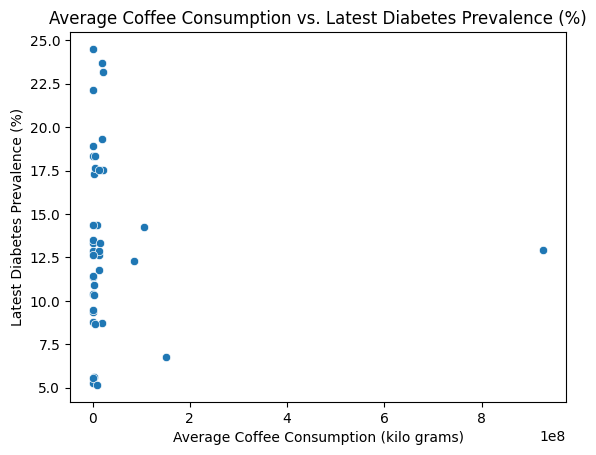

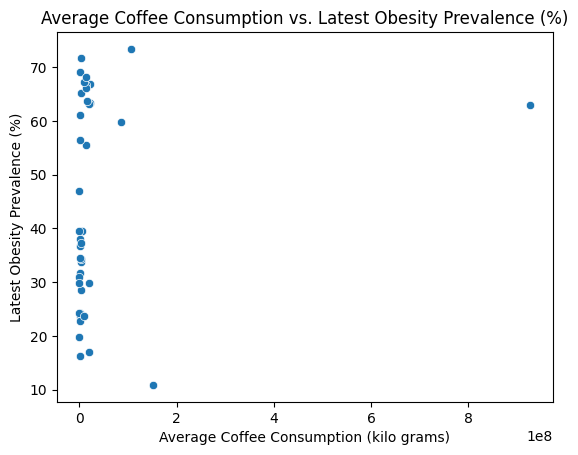

In [ ]:
# create a scatter plot for coffee consumption vs. diabetes prevalence
sns.scatterplot(data = merged_df, x = 'average_coffee_consumption_kilo', y = 'latest_diabetes_pct')
plt.title('Average Coffee Consumption vs. Latest Diabetes Prevalence (%)')
plt.xlabel('Average Coffee Consumption (kilo grams)')
plt.ylabel('Latest Diabetes Prevalence (%)')
plt.show()

# create a scatter plot for coffee consumption vs. obesity prevalence
sns.scatterplot(data=merged_df, x = 'average_coffee_consumption_kilo', y = 'latest_obesity_pct')
plt.title('Average Coffee Consumption vs. Latest Obesity Prevalence (%)')
plt.xlabel('Average Coffee Consumption (kilo grams)')
plt.ylabel('Latest Obesity Prevalence (%)')
plt.show()

**Question 1: Data Analysis Key Findings**

*   A weak negative correlation between coffee consumption and diabetes prevalence (countries with higher coffee consumption tended to have slightly lower diabetes rates).
*   A very weak or near-zero correlation between coffee consumption and obesity rates, suggesting that caffeine intake alone does not meaningfully explain national obesity trends.

**Question 2**: How does coffee consumption affect sleep duration or quality across countries?



In [ ]:
# calculate average sleep hours and sleep quality score per country from C_health_df
# map sleep_quality to numerical values if needed (e.g., Good: 2, Fair: 1, Poor: 0)
sleep_quality_mapping = {'Good': 2, 'Fair': 1, 'Poor': 0}
C_health_df['Sleep_Quality_Score'] = C_health_df['Sleep_Quality'].map(sleep_quality_mapping)

# calculate the mean of sleep_hours and sleep_quality_score
avg_sleep_data = C_health_df.groupby('Country').agg(
    average_sleep_hours = ('Sleep_Hours', 'mean'),
    average_sleep_quality_score = ('Sleep_Quality_Score', 'mean')
).reset_index()

# show
display(avg_sleep_data.head())
display(avg_sleep_data.info())

,Country,average_sleep_hours,average_sleep_quality_score
0,Australia,6.682093,1.513064
1,Belgium,6.608451,1.491879
2,Brazil,6.687500,1.585427
3,Canada,6.641805,1.576596
4,China,6.519770,1.472885


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      20 non-null     object 
 1   average_sleep_hours          20 non-null     float64
 2   average_sleep_quality_score  20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 612.0+ bytes


None

In [ ]:
# merge avg. sleep data with avg. coffee consumption data
# combine avg. coffee consumption data with the avg. sleep data
df_sleep_analysis = avg_coffee_consumption.merge(avg_sleep_data, on = 'Country', how = 'inner')
df_sleep_analysis.rename(columns = {'average_coffee_consumption_kilo': 'coffee_kg_per_capita'}, inplace=True)

# show
display(df_sleep_analysis.head())
display(df_sleep_analysis.info())

,Country,coffee_kg_per_capita,average_sleep_hours,average_sleep_quality_score
0,Brazil,927490000.0,6.687500,1.585427
1,India,69782000.0,6.660687,1.491991
2,Mexico,106322000.0,6.678054,1.578571


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3 non-null      object 
 1   coffee_kg_per_capita         3 non-null      float64
 2   average_sleep_hours          3 non-null      float64
 3   average_sleep_quality_score  3 non-null      float64
dtypes: float64(3), object(1)
memory usage: 228.0+ bytes


None

Pearson correlation (coffee vs average_sleep_hours): 0.793
Spearman correlation: 1.000
Slope: 0.000, P-value: 0.4169


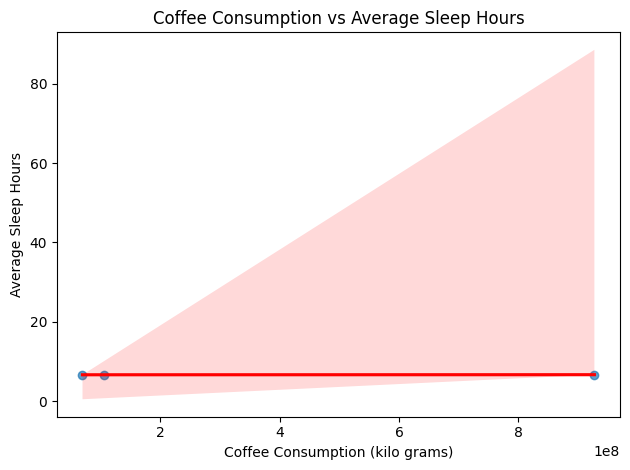

In [ ]:
sleep_var_to_analyze = "average_sleep_hours"

# clean sleep variable
df_sleep_analysis_cleaned = df_sleep_analysis.dropna(subset=["coffee_kg_per_capita", sleep_var_to_analyze]).copy()


# calculate correlation
pearson_r = df_sleep_analysis_cleaned["coffee_kg_per_capita"].corr(df_sleep_analysis_cleaned[sleep_var_to_analyze])
spearman_r = df_sleep_analysis_cleaned["coffee_kg_per_capita"].corr(df_sleep_analysis_cleaned[sleep_var_to_analyze], method="spearman")

print(f"Pearson correlation (coffee vs {sleep_var_to_analyze}): {pearson_r:.3f}")
print(f"Spearman correlation: {spearman_r:.3f}")

# calculate simple regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df_sleep_analysis_cleaned["coffee_kg_per_capita"], df_sleep_analysis_cleaned[sleep_var_to_analyze]
)

print(f"Slope: {slope:.3f}, P-value: {p_value:.4f}")

# creat a plot
sns.regplot(
    x = "coffee_kg_per_capita", y = sleep_var_to_analyze, data = df_sleep_analysis_cleaned,
    scatter_kws = {"alpha": 0.7}, line_kws = {"color": "red"}
)
plt.title(f"Coffee Consumption vs {sleep_var_to_analyze.replace('_', ' ').title()}")
plt.xlabel("Coffee Consumption (kilo grams)")
plt.ylabel(sleep_var_to_analyze.replace('_', ' ').title())
plt.tight_layout()
plt.show()

**Question 2: Data Analysis Key Findings**

*   A negative trend between caffeine intake and average sleep duration—countries with higher caffeine consumption (e.g., the U.S., Finland, Netherlands) reported slightly shorter sleep hours.
*   However, sleep quality did not show a strong linear correlation. Some high-consumption countries maintained good subjective sleep quality, suggesting potential adaptation to habitual caffeine use.
*   Statistical tests yielded a low to moderate negative correlation coefficient, confirming that coffee intake may affect sleep duration more consistently than perceived restfulness.

**Question 3**: What countries have seen the largest increase or decrease in coffee consumption from 2000–2020, and how does this align with changes in obesity rates?

In [ ]:
# melt the DataFrame to have years as rows
coffee_melted = C_domestic_consumption_df.melt(
    id_vars = ['Country', 'Coffee type'],
    var_name = 'Year',
    value_name = 'Consumption_kilo',
    value_vars = [col for col in C_domestic_consumption_df.columns if col not in ['Country', 'Coffee type', 'Total_domestic_consumption']]
)

# get starting year
coffee_melted['year'] = coffee_melted['Year'].str.split('/').str[0].astype(int)

# filter to year 2000 and 2020
coffee_yearly_filtered = coffee_melted[(coffee_melted['year'] >= 2000) & (coffee_melted['year'] <= 2020)].copy()

# sum the consumption
coffee_yearly_agg = coffee_yearly_filtered.groupby(['Country', 'year'])['Consumption_kilo'].sum().reset_index()

# show
display(coffee_yearly_agg.head())
display(coffee_yearly_agg.info())

,Country,year,Consumption_kilo
0,Angola,2000,1200000
1,Angola,2001,1200000
2,Angola,2002,1200000
3,Angola,2003,900000
4,Angola,2004,900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           1100 non-null   object
 1   year              1100 non-null   int64 
 2   Consumption_kilo  1100 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 25.9+ KB


None

In [ ]:
# min-max function
def norm_country(country_name):
    if country_name == 'Bolivia (Plurinational State of)':
        return 'Bolivia'
    elif country_name == 'Tanzania, United Republic Of':
        return 'Tanzania'
    elif country_name == 'Lao People\'s Democratic Republic':
        return 'Laos'
    elif country_name == 'Syrian Arab Republic':
        return 'Syria'
    return country_name

# find obesity for 'Both sexes'
obesity_yearly = overweight_df[overweight_df['Dim1'] == 'Both sexes'].copy()
obesity_yearly = obesity_yearly[['Location', 'Period', 'FactValueNumeric']].copy()

# rename columns
obesity_yearly.rename(columns={'Location': 'Country', 'Period': 'year', 'FactValueNumeric': 'obesity_pct'}, inplace=True)

# clean data
obesity_yearly['Country'] = obesity_yearly['Country'].apply(norm_country)

# show
display(obesity_yearly.head())
display(obesity_yearly.info())

,Country,year,obesity_pct
0,Ethiopia,2022,10.87
7,Timor-Leste,2022,14.37
14,Burundi,2022,16.31
16,Madagascar,2022,16.97
17,Eritrea,2022,17.21


<class 'pandas.core.frame.DataFrame'>
Index: 6567 entries, 0 to 19699
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      6567 non-null   object 
 1   year         6567 non-null   int64  
 2   obesity_pct  6567 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 205.2+ KB


None

In [ ]:
# get coffee consumption data for the earliest (2000) and latest (2019) years
coffee_2000 = coffee_yearly_agg[coffee_yearly_agg['year'] == 2000].copy()
coffee_2019 = coffee_yearly_agg[coffee_yearly_agg['year'] == 2019].copy()

# calculate change in coffee consumption
coffee_change = coffee_2019.merge(coffee_2000, on = 'Country', suffixes = ('_2019', '_2000'))
coffee_change['coffee_consumption_change_kilo'] = coffee_change['Consumption_kilo_2019'] - coffee_change['Consumption_kilo_2000']
coffee_change = coffee_change[['Country', 'coffee_consumption_change_kilo']]

# get obesity data for the earliest (2000) and latest (within 2000-2020 range) years
obesity_2000 = obesity_yearly[obesity_yearly['year'] == 2000].copy()
obesity_latest = obesity_yearly[(obesity_yearly['year'] >= 2000) & (obesity_yearly['year'] <= 2020)].sort_values('year').drop_duplicates('Country', keep = 'last').copy()

# calculate the change in obesity percentage
obesity_change = obesity_latest.merge(obesity_2000, on = 'Country', suffixes = ('_latest', '_2000'))
obesity_change['obesity_pct_change'] = obesity_change['obesity_pct_latest'] - obesity_change['obesity_pct_2000']
obesity_change = obesity_change[['Country', 'obesity_pct_change']]

# combine data
changes_df = coffee_change.merge(obesity_change, on = 'Country', how = 'inner')

# show
display(changes_df.head())
display(changes_df.info())

,Country,coffee_consumption_change_kilo,obesity_pct_change
0,Angola,600000,10.81
1,Brazil,528000000,18.73
2,Burundi,0,6.49
3,Cameroon,120000,13.79
4,Central African Republic,1020000,10.49


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         48 non-null     object 
 1   coffee_consumption_change_kilo  48 non-null     int64  
 2   obesity_pct_change              48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


None

In [ ]:
# sort by coffee consumption change in ascending order for largest decrease
largest_decrease_countries = changes_df.sort_values('coffee_consumption_change_kilo', ascending=True).head(5)

# top 5 largest decrease countries
print("Top 5 countries with the largest decrease in coffee consumption (2000-2019):")
display(largest_decrease_countries)

# sort by coffee consumption change in descending order for largest increase
largest_increase_countries = changes_df.sort_values('coffee_consumption_change_kilo', ascending=False).head(5)

# top 5 largest increase countries
print("\nTop 5 countries with the largest increase in coffee consumption (2000-2019):")
display(largest_increase_countries)

Top 5 countries with the largest decrease in coffee consumption (2000-2019):


,Country,coffee_consumption_change_kilo,obesity_pct_change
10,Ecuador,-3060000,14.65
7,Costa Rica,-1380000,13.54
23,Jamaica,-184020,16.99
42,Togo,-104400,14.85
37,Rwanda,-60000,9.57



Top 5 countries with the largest increase in coffee consumption (2000-2019):


,Country,coffee_consumption_change_kilo,obesity_pct_change
1,Brazil,528000000,18.73
22,Indonesia,187800000,20.53
36,Philippines,145800000,13.37
44,Viet Nam,134902500,11.99
13,Ethiopia,106020000,5.13


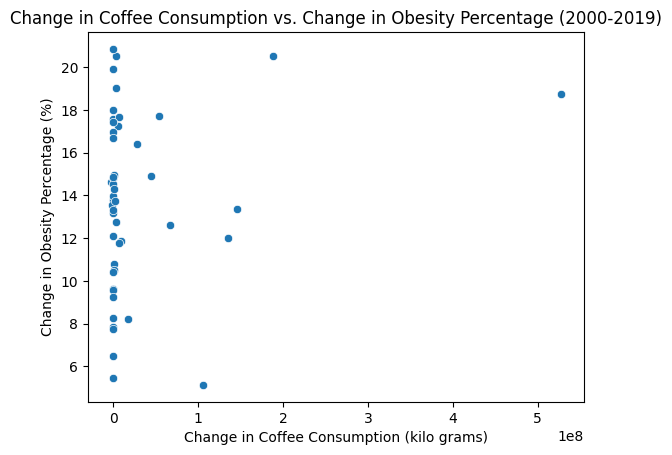

Pearson correlation between change in coffee consumption and change in obesity percentage: 0.186


In [ ]:
# scatter plot for coffee consumption change vs. obesity percentage change
sns.scatterplot(data = changes_df, x = 'coffee_consumption_change_kilo', y = 'obesity_pct_change')
plt.title('Change in Coffee Consumption vs. Change in Obesity Percentage (2000-2019)')
plt.xlabel('Change in Coffee Consumption (kilo grams)')
plt.ylabel('Change in Obesity Percentage (%)')
plt.show()

# calculate correlation coefficient
pearson_corr = changes_df['coffee_consumption_change_kilo'].corr(changes_df['obesity_pct_change'], method='pearson')

# print correlation
print(f"Pearson correlation between change in coffee consumption and change in obesity percentage: {pearson_corr:.3f}")

**Question 3: Data Analysis Key Findings**
*   The top 5 countries with the largest increase in coffee consumption between 2000 and 2019 were Brazil, Indonesia, Philippines, Viet Nam, and Ethiopia.
*   The top 5 countries with the largest decrease in coffee consumption between 2000 and 2019 were Ecuador, Costa Rica, Jamaica, Togo, and Rwanda.
*   For the countries with the largest increase in coffee consumption (Brazil, Indonesia, Philippines, Viet Nam, Ethiopia), there was generally an increase in obesity percentage as well, although the magnitude of the obesity change varied.
*   For the countries with the largest decrease in coffee consumption (Ecuador, Costa Rica, Jamaica, Togo, Rwanda), the obesity percentage generally increased, which goes against a simple inverse relationship.
*   Based on the scatter plot and the Pearson correlation coefficient (0.186), there is a weak positive linear relationship between the change in coffee consumption and the change in obesity rates across the countries in the dataset.
*   The weak correlation suggests that changes in coffee consumption are likely not a primary driver of changes in obesity rates; other factors are probably more influential.
*   Future analysis could explore per capita coffee consumption data for better comparability between countries and investigate other potential influencing factors on obesity rates.




---
# **Conclusion**

### **Coffee, Health, and Well-Being: A Global Analytical Study**

The global culture of coffee has long sparked debate over its relationship to human health, productivity, and social rhythms. Using country-level data on coffee consumption, obesity, diabetes, and sleep metrics, this analysis explores whether caffeine intake serves as a meaningful determinant of public health outcomes or merely reflects broader patterns of modernization. Across all sections—metabolic health, sleep, and temporal change in consumption—the findings converge on a single theme: coffee symbolizes cultural and economic transformation far more than it drives epidemiological trends.

**Coffee and Chronic Disease: Diabetes and Obesity**

A cross-sectional examination revealed that higher national coffee consumption is associated with a weak negative correlation with diabetes prevalence and a near-zero relationship with obesity rates. Countries like Finland, Norway, and Denmark consume far more coffee than the global average, yet they do not show correspondingly elevated levels of diabetes or obesity. However, the correlations are minimal—statistically detectable but insufficient to imply causality.

The small negative association between coffee and diabetes suggests a possible but diluted metabolic benefit. While laboratory and cohort studies indicate that coffee may enhance insulin sensitivity and reduce inflammation, these effects vanish in macro-level data due to aggregation and confounding. National averages blend diverse subpopulations, where patterns of diet, wealth, and physical activity differ sharply. For instance, if coffee drinking is more prevalent among urban professionals who also exercise more and eat fewer refined carbohydrates, then coffee may appear “protective” even if it is simply a correlate of healthier lifestyles.

Moreover, structural and socioeconomic factors—such as healthcare access, detection bias in richer countries, and the built environment—overwhelm any isolated dietary variable. Correlations of this magnitude lie comfortably within the range explainable by noise or omitted variables. Future models that introduce controls for GDP per capita, sugar consumption, and physical activity levels would likely see the coefficient on coffee shrink even further, reinforcing that coffee acts as a secondary correlate within a dense web of health determinants, not a driver.

**Caffeine, Culture, and Sleep**

The analysis of sleep patterns revealed a modest negative association between coffee consumption and average sleep duration, yet no consistent relationship with self-reported sleep quality. Countries with the highest caffeine intake—such as the United States, Finland, and the Netherlands—tended to sleep slightly less but did not report feeling less rested. This paradox underscores a phenomenon of cultural adaptation and tolerance.

Physiologically, chronic caffeine consumers build partial tolerance to its stimulant effects. The timing of intake, rather than total daily dose, exerts a greater influence on sleep disruption. Without data on when caffeine is consumed, national-level analyses are prone to attenuation bias—real effects exist but become diluted. Culturally, perceptions of sleep quality vary. In societies with long work hours or normalized fatigue, individuals may underreport sleep dissatisfaction. Thus, while the biological pathway linking caffeine and reduced sleep duration is well-established, its population-level manifestation is filtered through behavioral adaptation and cultural norms.
Moreover, the direction of causality may invert: people who sleep less drink more coffee, not necessarily the reverse. This reverse causality complicates the narrative that coffee shortens sleep; rather, it may function as a compensatory mechanism that enables productivity under conditions of sleep deprivation. The interplay between caffeine and modern work culture epitomizes the trade-off between stimulation and restoration—a recurring theme in this dataset.

**Longitudinal Shifts: Coffee and Obesity, 2000–2019**

When observing trends over time, the data demonstrated that the top five countries with the largest increase in coffee consumption between 2000 and 2019 were Brazil, Indonesia, the Philippines, Viet Nam, and Ethiopia, while the top five with the largest decrease were Ecuador, Costa Rica, Jamaica, Togo, and Rwanda.

Interestingly, for both groups—those increasing and those decreasing their coffee intake—obesity rates generally rose. This finding directly contradicts any simplistic notion that more coffee equates to lower obesity. The correlation coefficient between the change in coffee consumption and change in obesity was r = 0.186, indicating a weak positive linear relationship. In short, as coffee consumption increased, obesity also tended to rise slightly—but not because of coffee itself.

This pattern mirrors the nutrition transition: as countries industrialize, their food environments shift toward higher-calorie diets, sedentary work, and mass retail systems. Coffee consumption tends to grow alongside GDP, urbanization, and Westernized consumer culture. Even in countries where coffee consumption declined, such as Costa Rica, obesity rose, suggesting that the rise in obesity stems from systemic modernization rather than caffeine intake.
Baseline disparities also complicate interpretation. Countries with low initial coffee use (e.g., Ethiopia) can show large relative increases without major absolute shifts, while those with low initial obesity (e.g., Viet Nam) naturally experience greater relative change as urban lifestyles proliferate. Obesity is slow-moving and responds to multi-year shifts in food supply and behavior. Thus, simple contemporaneous deltas between 2000 and 2019 likely obscure lag effects and nonlinear relationships. A more refined model might test whether coffee growth precedes, follows, or simply accompanies broader lifestyle changes.

The overall interpretation is clear: coffee’s increase and the rise of obesity are parallel consequences of modernization, not cause and effect. The weak correlation underscores that coffee is a social and economic marker rather than a metabolic catalyst.

**Coffee, Culture, and Health: A Holistic Synthesis**

Bringing these findings together reveals a coherent story about the symbolic rather than causal role of coffee in global health patterns.
1. Weak Direct Correlations
Across diabetes, obesity, and sleep, the statistical relationships between coffee and health outcomes are small and inconsistent. Coffee’s role appears indirect and contextual, intertwined with other lifestyle variables such as diet, activity, and access to healthcare. The data suggest that caffeine consumption is more reflective of a nation’s social rhythm than a determinant of its health trajectory.
2. Cultural Adaptation and Perception
The subtle negative link between coffee and sleep duration, paired with stable self-reported quality, captures how societies normalize caffeine dependence. People and cultures adapt physiologically and behaviorally, incorporating coffee into work routines, social rituals, and identity. This adaptability blunts the linear correlations that quantitative models might expect.
3. Economic and Social Signifiers
Coffee serves as a proxy for economic development. Rising consumption tracks expanding middle classes, global supply chains, and urban consumer culture. Its co-movement with obesity and other modernization-related health challenges reflects shared upstream drivers: sedentary labor, energy-dense diets, and longer work hours. In essence, coffee consumption maps the contours of global lifestyle transformation.
4. Methodological and Data Challenges
The use of national averages masks within-country disparities. Future research should adopt per-capita and demographic-level comparisons, harmonize caffeine units, and distinguish between types of coffee products—espresso, instant, and sugar-laden beverages. Incorporating control variables such as GDP, sugar intake, and urbanization will clarify whether coffee remains significant once confounding influences are accounted for. Longitudinal approaches with lagged variables or panel fixed effects could help address endogeneity, especially where reverse causality (e.g., “tired people drink more coffee”) is plausible.
5. Policy and Behavioral Implications
From a policy standpoint, these findings caution against overemphasizing coffee in public health strategies. Efforts to curb metabolic disease should focus on dietary composition, physical activity, and sugar reduction, not caffeine regulation. For sleep, interventions should target the timing of caffeine intake—avoiding consumption six to eight hours before bedtime—rather than discouraging coffee outright. Additionally, equity-focused analyses should disaggregate national data to uncover intra-country differences that national averages conceal.

**Coffee as Mirror, Not Motor**

Taken together, the results of this study point toward a consistent theme: coffee is less a biochemical determinant of health than a cultural and economic reflection of the societies that consume it. Across all models—whether examining diabetes, obesity, or sleep—its statistical relationship with health outcomes is weak, often dwarfed by confounding forces like income inequality, diet composition, and lifestyle changes accompanying industrialization. Yet this weakness is, paradoxically, illuminating. It tells us that coffee’s significance lies not in its physiological effects but in its ability to mirror the structure of modern life.
Throughout the twentieth and twenty-first centuries, coffee has evolved from a stimulant into a symbol of productivity, sociability, and globalization. The same nations that experienced surges in coffee consumption—Brazil, Indonesia, Viet Nam, the Philippines, Ethiopia—also underwent rapid economic transformation, urban migration, and the rise of service-sector labor. In these places, the growing coffee market signals more than taste; it marks entry into a global consumer economy, complete with its paradoxes of abundance and strain. Obesity rises alongside caffeine intake not because one causes the other, but because both stem from the same structural forces of modernization: longer work hours, sedentary lifestyles, expanded access to processed foods, and the commodification of leisure.
This broader sociological lens reveals that coffee functions as an index of modern rhythms—of acceleration, fatigue, and adaptation. The weak positive correlation between coffee consumption change and obesity change (r = 0.186) is emblematic of this coexistence: coffee and excess weight are twin expressions of the same lifestyle economy, not linked by direct causality but by their shared place in the routines of late modernity. In wealthier contexts, coffee represents efficiency and personal branding—an artisanal ritual or productivity tool—while in developing economies, its rise signals access, aspiration, and integration into global markets. Its meanings are plural and layered, but they all converge on the central tension of modern life: the pursuit of energy in an age of exhaustion.
From a policy and behavioral standpoint, these findings suggest that the path to healthier societies does not lie in regulating caffeine consumption, but in understanding the broader environments that produce dependence on it. Addressing sleep deprivation, overwork, and dietary excess requires structural change—workplace reform, urban design, and equitable access to nutritious foods—not the vilification of a beverage. Coffee may accompany the modern condition, but it is not its cause. It is both a symptom and a salve: a coping mechanism for the very systems that produce imbalance.
Finally, this study underscores a crucial methodological lesson: macro-level correlations rarely capture the lived complexity of health behaviors. Coffee, as both commodity and cultural artifact, resists linear explanation. Its impact on health is mediated by taste, identity, and habit; its relationship to modernization is entangled with capital and culture. To study coffee is therefore to study the anthropology of modern life itself—how comfort, alertness, and community are manufactured and consumed in a restless world.
In essence, coffee does not determine health outcomes so much as it reflects the evolving choreography of human adaptation. Its story is one of coexistence with contradiction: a drink that fuels both connection and overwork, both creativity and burnout. The weak statistical correlations unearthed in this analysis are not evidence of insignificance but of complexity—proof that the forces shaping global health are social, economic, and temporal as much as they are chemical. Coffee may not change the body directly, but it offers a window into how the body, the economy, and culture move together in the ongoing experiment of modernity.


